# Binomial Family

In [23]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0=malignant, 1=benign

In [4]:
# Use only a few predictors
X = X[['mean radius', 'mean texture', 'mean symmetry']]
X = sm.add_constant(X)
X

,const,mean radius,mean texture,mean symmetry
0,1.0,17.99,10.38,0.2419
1,1.0,20.57,17.77,0.1812
2,1.0,19.69,21.25,0.2069
3,1.0,11.42,20.38,0.2597
4,1.0,20.29,14.34,0.1809
...,...,...,...,...
564,1.0,21.56,22.39,0.1726
565,1.0,20.13,28.25,0.1752
566,1.0,16.60,28.08,0.1590
567,1.0,20.60,29.33,0.2397


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Logistic

In [6]:
# Logistic Regression (GLM with binomial link logit)
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  455
Model:                            GLM   Df Residuals:                      451
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.251
Date:                Wed, 19 Nov 2025   Deviance:                       166.50
Time:                        11:56:00   Pearson chi2:                     419.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6155
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.9778      4.046      8.646

In [7]:
# Logistic prediction: probability of benign
pred_prob = result.predict(X_test)
print("Predicted probs\n", pred_prob)

Predicted probs
 421    0.574895
47     0.658686
292    0.979226
186    0.031182
414    0.020101
         ...   
172    0.635569
3      0.492868
68     0.998674
448    0.891396
442    0.989437
Length: 114, dtype: float64


In [8]:
y_pred_test = (pred_prob > 0.5).astype(int)
tst_acc = accuracy_score(y_test, y_pred_test)
print(f'Test accuracy: {tst_acc}')

Test accuracy: 0.8947368421052632


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8947368421052632

## Probit

In [10]:
import statsmodels.api as sm

probit_model = sm.Probit(y_train, X_train)
probit_result = probit_model.fit()
print(probit_result.summary())

Optimization terminated successfully.
         Current function value: 0.185039
         Iterations 9
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  455
Model:                         Probit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.7200
Time:                        12:00:09   Log-Likelihood:                -84.193
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                 1.576e-93
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.6545      1.907      9.781      0.000      14.916      22.393
mean radius      -0.

In [11]:
# Logistic prediction: probability of benign
probit_pred_prob = probit_result.predict(X_test)
print("Predicted probs\n", probit_pred_prob)

Predicted probs
 421    0.567514
47     0.642797
292    0.980423
186    0.033021
414    0.019597
         ...   
172    0.618255
3      0.505250
68     0.999812
448    0.869405
442    0.992263
Length: 114, dtype: float64


In [12]:
y_pred_test_probit = (probit_pred_prob > 0.5).astype(int)
tst_acc = accuracy_score(y_test, y_pred_test_probit)
print(f'Test accuracy: {tst_acc}')

Test accuracy: 0.8859649122807017


# Poisson Regression

In [14]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load dataset
from ISLP import load_data
data = load_data('Bikeshare')

data.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [15]:


# Variables
y = data['bikers']         # number of claims
X = data[['mnth', 'hr', 'workingday', 'temp', 'weathersit']]

X = sm.add_constant(X)
X.head()

,const,mnth,hr,workingday,temp,weathersit
0,1.0,Jan,0,0,0.24,clear
1,1.0,Jan,1,0,0.22,clear
2,1.0,Jan,2,0,0.22,clear
3,1.0,Jan,3,0,0.24,clear
4,1.0,Jan,4,0,0.24,clear


In [16]:
X['mnth'] = LabelEncoder().fit_transform(data['mnth'])
X['weathersit'] = LabelEncoder().fit_transform(data['weathersit'])
X.head()

,const,mnth,hr,workingday,temp,weathersit
0,1.0,4,0,0,0.24,0
1,1.0,4,1,0,0.22,0
2,1.0,4,2,0,0.22,0
3,1.0,4,3,0,0.24,0
4,1.0,4,4,0,0.24,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# Poisson GLM
poisson_model = sm.Poisson(y_train, X_train)
poisson_result = poisson_model.fit()

print(poisson_result.summary())

Optimization terminated successfully.
         Current function value: 41.343849
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                 bikers   No. Observations:                 6916
Model:                        Poisson   Df Residuals:                     6910
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.3485
Time:                        12:08:13   Log-Likelihood:            -2.8593e+05
converged:                       True   LL-Null:                   -4.3888e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2122      0.004    724.613      0.000       3.203       3.221
mnth           0.0227      0

In [20]:
y_pred_test = round(poisson_result.predict(X_test))
y_pred_test

6332    160.0
5155    175.0
6021    214.0
8447    116.0
82       91.0
        ...  
3983    311.0
6195    241.0
2140     56.0
1990    137.0
7099     99.0
Length: 1729, dtype: float64

In [21]:
mean_squared_error(y_test, y_pred_test)

12600.083863504917

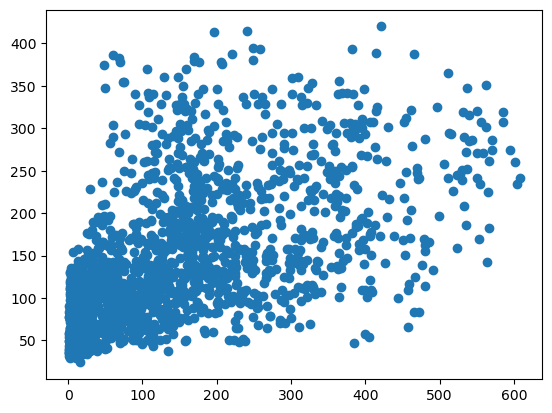

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)

In [24]:
r2_score(y_test, y_pred_test)

0.3251926911635128